# Ejercicio 1

Implementar los siguientes m√©todos de descenso gradiente (na√Øve = tama√±o de paso Œ± constante):

- descenso gradiente na√Øve con direcci√≥n de descenso aleatoria  
- descenso m√°ximo na√Øve  
- descenso grediente de Newton, con Hessiano exacto  
- un m√©todo de gradiente conjugado (Fletcher-Reeves, Hestenes-Stiefel, Polak-Ribi√®re)  
- el m√©todo BFGS.  

En cada uno de los m√©todos, su funci√≥n debe recibir los siguientes argumentos:  
¬à la funci√≥n objetivo f,  
¬à el gradiente de la funci√≥n objetivo df,  
¬à el hessiano ddf (cuando sea necesario),  
¬à un punto inicial x0 ‚àà ‚Ñù‚Åø,  
¬à el tama√±o de paso Œ± > 0,  
¬à el n√∫mero m√°ximo de iteraciones maxIter,  
¬à la tolerancia Œµ, as√≠ como un criterio de paro.  

Como resultado, sus algoritmos deben devolver:  
- la mejor soluci√≥n encontrada `best` (la √∫ltima de las aproximaciones calculadas),  
- la secuencia de iteraciones `xk`,  
- la secuencia de valores `f(xk)`,  
- la secuencia de errores en cada paso (seg√∫n el error de su criterio de paro).  

Adem√°s, es deseable indicar:  
- el n√∫mero de iteraciones efectuadas por el algoritmo,  
- si se obtuvo o no convergencia del m√©todo.  

In [20]:
# libs
import numpy as np

In [21]:
def descenso_gradiente_naive(f, df, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Implementaci√≥n simple del descenso gradiente con paso fijo (Œ± constante).

    Args:
        f (funci√≥n): Funci√≥n objetivo a minimizar.
        df (funci√≥n): Gradiente de la funci√≥n.
        x0 (array): Punto inicial.
        alpha (float): Tama√±o del paso (learning rate).
        max_iter (int): M√°ximo n√∫mero de iteraciones.
        tol (float): Tolerancia para detenerse (si el cambio en f(x) es muy peque√±o).

    Returns:
        mejor_x (array): Mejor soluci√≥n encontrada.
        historial_x (list): Lista de todas las posiciones x visitadas.
        historial_f (list): Lista de valores f(x) en cada paso.
        convergio (bool): True si el m√©todo convergi√≥ antes de max_iter.
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        x_nuevo = x_actual - alpha * gradiente

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(x_nuevo - x_actual) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [22]:
def descenso_gradiente_aleatorio(f, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Descenso gradiente con direcci√≥n aleatoria (no usa el gradiente real).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        direccion_aleatoria = np.random.randn(*x0.shape)
        direccion_aleatoria = direccion_aleatoria / np.linalg.norm(direccion_aleatoria)

        x_nuevo = x_actual - alpha * direccion_aleatoria

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(x_nuevo - x_actual) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [23]:
def descenso_maximo_naive(f, df, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Descenso m√°ximo (usa el gradiente real, pero con paso fijo).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        x_nuevo = x_actual - alpha * gradiente

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [24]:
def newton(f, df, ddf, x0, max_iter=1000, tol=1e-6):
    """
    M√©todo de Newton (usa el Hessiano para ajustar el paso).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        hessiano = ddf(x_actual)

        paso = np.linalg.solve(hessiano, -gradiente)
        x_nuevo = x_actual + paso

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [25]:
def gradiente_conjugado_fletcher_reeves(f, df, x0, max_iter=1000, tol=1e-6):
    """
    Gradiente conjugado (Fletcher-Reeves).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    gradiente_actual = df(x_actual)
    direccion = -gradiente_actual

    for iteracion in range(max_iter):
        alpha = 0.01
        x_nuevo = x_actual + alpha * direccion

        gradiente_nuevo = df(x_nuevo)

        beta = np.dot(gradiente_nuevo, gradiente_nuevo) / np.dot(gradiente_actual, gradiente_actual)
        direccion = -gradiente_nuevo + beta * direccion

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente_nuevo) < tol:
            convergio = True
            break

        x_actual = x_nuevo
        gradiente_actual = gradiente_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [26]:
def bfgs(f, df, x0, max_iter=1000, tol=1e-6):
    """
    M√©todo BFGS (aproxima el Hessiano usando diferencias de gradientes).
    """
    n = len(x0)
    H = np.eye(n)
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    gradiente_actual = df(x_actual)

    for iteracion in range(max_iter):
        paso = -H @ gradiente_actual

        alpha = 0.01
        x_nuevo = x_actual + alpha * paso

        gradiente_nuevo = df(x_nuevo)

        s = x_nuevo - x_actual
        y = gradiente_nuevo - gradiente_actual

        rho = 1.0 / (y.T @ s)
        H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente_nuevo) < tol:
            convergio = True
            break

        x_actual = x_nuevo
        gradiente_actual = gradiente_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

# Ejercicio 2

Testar sus algoritmos del Ejercicio 1 con las siguientes funciones:

a) La funci√≥n dada por  

$$
f(x, y) = x^4 + y^4 - 4xy + \frac{1}{2}y + 1
$$

Punto inicial:  

$$
\mathbf{x}_0 = (-3, 1, -3, 1)^T
$$  

√ìptimo:  

$$
\mathbf{x}^* = (-1.01463, -1.04453)^T, \quad f(\mathbf{x}^*) = -1.51132
$$


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir la funci√≥n a) f(x,y) = x^4 + y^4 - 4xy + (1/2)y + 1
def f_a(x):
    """Funci√≥n objetivo a minimizar"""
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df_a(x):
    """Gradiente de f(x,y)"""
    df_dx = 4*x[0]**3 - 4*x[1]
    df_dy = 4*x[1]**3 - 4*x[0] + 0.5
    return np.array([df_dx, df_dy])

def ddf_a(x):
    """Hessiano de f(x,y)"""
    d2f_dx2 = 12*x[0]**2
    d2f_dy2 = 12*x[1]**2
    d2f_dxdy = -4
    return np.array([[d2f_dx2, d2f_dxdy], 
                     [d2f_dxdy, d2f_dy2]])

# Punto inicial y soluci√≥n √≥ptima conocida
x0 = np.array([-3.0, 1.0])
x_optimo = np.array([-1.01463, -1.04453])
f_optimo = -1.51132

print("="*70)
print("TESTING ALGORITMOS DE OPTIMIZACI√ìN - FUNCI√ìN A")
print("="*70)
print(f"Funci√≥n: f(x,y) = x‚Å¥ + y‚Å¥ - 4xy + 0.5y + 1")
print(f"Punto inicial: x‚ÇÄ = {x0}")
print(f"√ìptimo conocido: x* = {x_optimo}, f(x*) = {f_optimo:.5f}")
print("="*70)

# Par√°metros para los algoritmos
alpha = 0.01  # Tama√±o de paso inicial
max_iter = 500
tol = 1e-6

# Ejecutar todos los algoritmos
resultados = {}

print("\nEJECUTANDO ALGORITMOS...")
print("-"*40)

# 1. Descenso gradiente na√Øve
print("1. Descenso gradiente na√Øve...")
try:
    best_1, hist_x_1, hist_f_1, conv_1 = descenso_gradiente_naive(f_a, df_a, x0, alpha, max_iter, tol)
    error_1 = np.linalg.norm(best_1 - x_optimo)
    resultados['Descenso gradiente'] = {
        'convergencia': conv_1,
        'iteraciones': len(hist_x_1) - 1,
        'solucion': best_1,
        'error': error_1,
        'historial_x': hist_x_1,
        'historial_f': hist_f_1
    }
    print(f"   ‚úì Completado: {len(hist_x_1)-1} iteraciones, error: {error_1:.6f}")
except Exception as e:
    print(f"   ‚úó Error: {e}")
    resultados['Descenso gradiente'] = None

# 2. Descenso gradiente aleatorio
print("2. Descenso gradiente aleatorio...")
try:
    np.random.seed(42)  # Para reproducibilidad
    best_2, hist_x_2, hist_f_2, conv_2 = descenso_gradiente_aleatorio(f_a, x0, alpha*10, max_iter*2, tol)
    error_2 = np.linalg.norm(best_2 - x_optimo)
    resultados['Descenso aleatorio'] = {
        'convergencia': conv_2,
        'iteraciones': len(hist_x_2) - 1,
        'solucion': best_2,
        'error': error_2,
        'historial_x': hist_x_2,
        'historial_f': hist_f_2
    }
    print(f" Completado: {len(hist_x_2)-1} iteraciones, error: {error_2:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Descenso aleatorio'] = None

# 3. Descenso m√°ximo na√Øve
print("3. Descenso m√°ximo na√Øve...")
try:
    best_3, hist_x_3, hist_f_3, conv_3 = descenso_maximo_naive(f_a, df_a, x0, alpha, max_iter, tol)
    error_3 = np.linalg.norm(best_3 - x_optimo)
    resultados['Descenso m√°ximo'] = {
        'convergencia': conv_3,
        'iteraciones': len(hist_x_3) - 1,
        'solucion': best_3,
        'error': error_3,
        'historial_x': hist_x_3,
        'historial_f': hist_f_3
    }
    print(f" Completado: {len(hist_x_3)-1} iteraciones, error: {error_3:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Descenso m√°ximo'] = None

# 4. M√©todo de Newton
print("4. M√©todo de Newton...")
try:
    best_4, hist_x_4, hist_f_4, conv_4 = newton(f_a, df_a, ddf_a, x0, max_iter, tol)
    error_4 = np.linalg.norm(best_4 - x_optimo)
    resultados['Newton'] = {
        'convergencia': conv_4,
        'iteraciones': len(hist_x_4) - 1,
        'solucion': best_4,
        'error': error_4,
        'historial_x': hist_x_4,
        'historial_f': hist_f_4
    }
    print(f"  Completado: {len(hist_x_4)-1} iteraciones, error: {error_4:.6f}")
except Exception as e:
    print(f"   ‚úó Error: {e}")
    resultados['Newton'] = None

# 5. Fletcher-Reeves
print("5. Fletcher-Reeves...")
try:
    best_5, hist_x_5, hist_f_5, conv_5 = gradiente_conjugado_fletcher_reeves(f_a, df_a, x0, max_iter, tol)
    error_5 = np.linalg.norm(best_5 - x_optimo)
    resultados['Fletcher-Reeves'] = {
        'convergencia': conv_5,
        'iteraciones': len(hist_x_5) - 1,
        'solucion': best_5,
        'error': error_5,
        'historial_x': hist_x_5,
        'historial_f': hist_f_5
    }
    print(f" Completado: {len(hist_x_5)-1} iteraciones, error: {error_5:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Fletcher-Reeves'] = None

# 6. BFGS
print("6. BFGS...")
try:
    best_6, hist_x_6, hist_f_6, conv_6 = bfgs(f_a, df_a, x0, max_iter, tol)
    error_6 = np.linalg.norm(best_6 - x_optimo)
    resultados['BFGS'] = {
        'convergencia': conv_6,
        'iteraciones': len(hist_x_6) - 1,
        'solucion': best_6,
        'error': error_6,
        'historial_x': hist_x_6,
        'historial_f': hist_f_6
    }
    print(f" Completado: {len(hist_x_6)-1} iteraciones, error: {error_6:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['BFGS'] = None

print("\n" + "="*70)
print("TABLA COMPARATIVA DE RESULTADOS")
print("="*70)

# Crear tabla comparativa
tabla_data = []
for nombre, datos in resultados.items():
    if datos is not None:
        tabla_data.append([
            nombre,
            "S√≠" if datos['convergencia'] else "No",
            datos['iteraciones'],
            f"({datos['solucion'][0]:.5f}, {datos['solucion'][1]:.5f})",
            f"{datos['error']:.6f}"
        ])
    else:
        tabla_data.append([nombre, "Error", "-", "-", "-"])

# Crear DataFrame para mejor presentaci√≥n
df_resultados = pd.DataFrame(tabla_data, 
                           columns=['Algoritmo', 'Convergencia', 'Iteraciones', 'Soluci√≥n', 'Error'])

print(df_resultados.to_string(index=False))

print(f"\n* Error calculado como ||x_encontrado - x_√≥ptimo||‚ÇÇ")
print(f"* x_√≥ptimo = {x_optimo}")
print(f"* f(x_√≥ptimo) = {f_optimo:.5f}")

TESTING ALGORITMOS DE OPTIMIZACI√ìN - FUNCI√ìN A
Funci√≥n: f(x,y) = x‚Å¥ + y‚Å¥ - 4xy + 0.5y + 1
Punto inicial: x‚ÇÄ = [-3.  1.]
√ìptimo conocido: x* = [-1.01463 -1.04453], f(x*) = -1.51132

EJECUTANDO ALGORITMOS...
----------------------------------------
1. Descenso gradiente na√Øve...
   ‚úì Completado: 166 iteraciones, error: 0.000012
2. Descenso gradiente aleatorio...
 Completado: 1000 iteraciones, error: 4.242351
3. Descenso m√°ximo na√Øve...
 Completado: 217 iteraciones, error: 0.000002
4. M√©todo de Newton...
  Completado: 19 iteraciones, error: 2.823188
5. Fletcher-Reeves...
 Completado: 500 iteraciones, error: nan
6. BFGS...
 Completado: 500 iteraciones, error: 89.413667

TABLA COMPARATIVA DE RESULTADOS
         Algoritmo Convergencia  Iteraciones              Soluci√≥n     Error
Descenso gradiente           S√≠          166  (-1.01462, -1.04452)  0.000012
Descenso aleatorio           No         1000  (-5.23334, -1.49176)  4.242351
   Descenso m√°ximo           S√≠          2

C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:11: RuntimeWarning: overflow encountered in scalar power
  df_dx = 4*x[0]**3 - 4*x[1]
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:12: RuntimeWarning: overflow encountered in scalar power
  df_dy = 4*x[1]**3 - 4*x[0] + 0.5
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2548758238.py:20: RuntimeWarning: invalid value encountered in add
  direccion = -gradiente_nuevo + beta * direccion
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:7: RuntimeWarning: overflow encountered in scalar power
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1



VISUALIZACI√ìN DE TRAYECTORIAS DE CONVERGENCIA


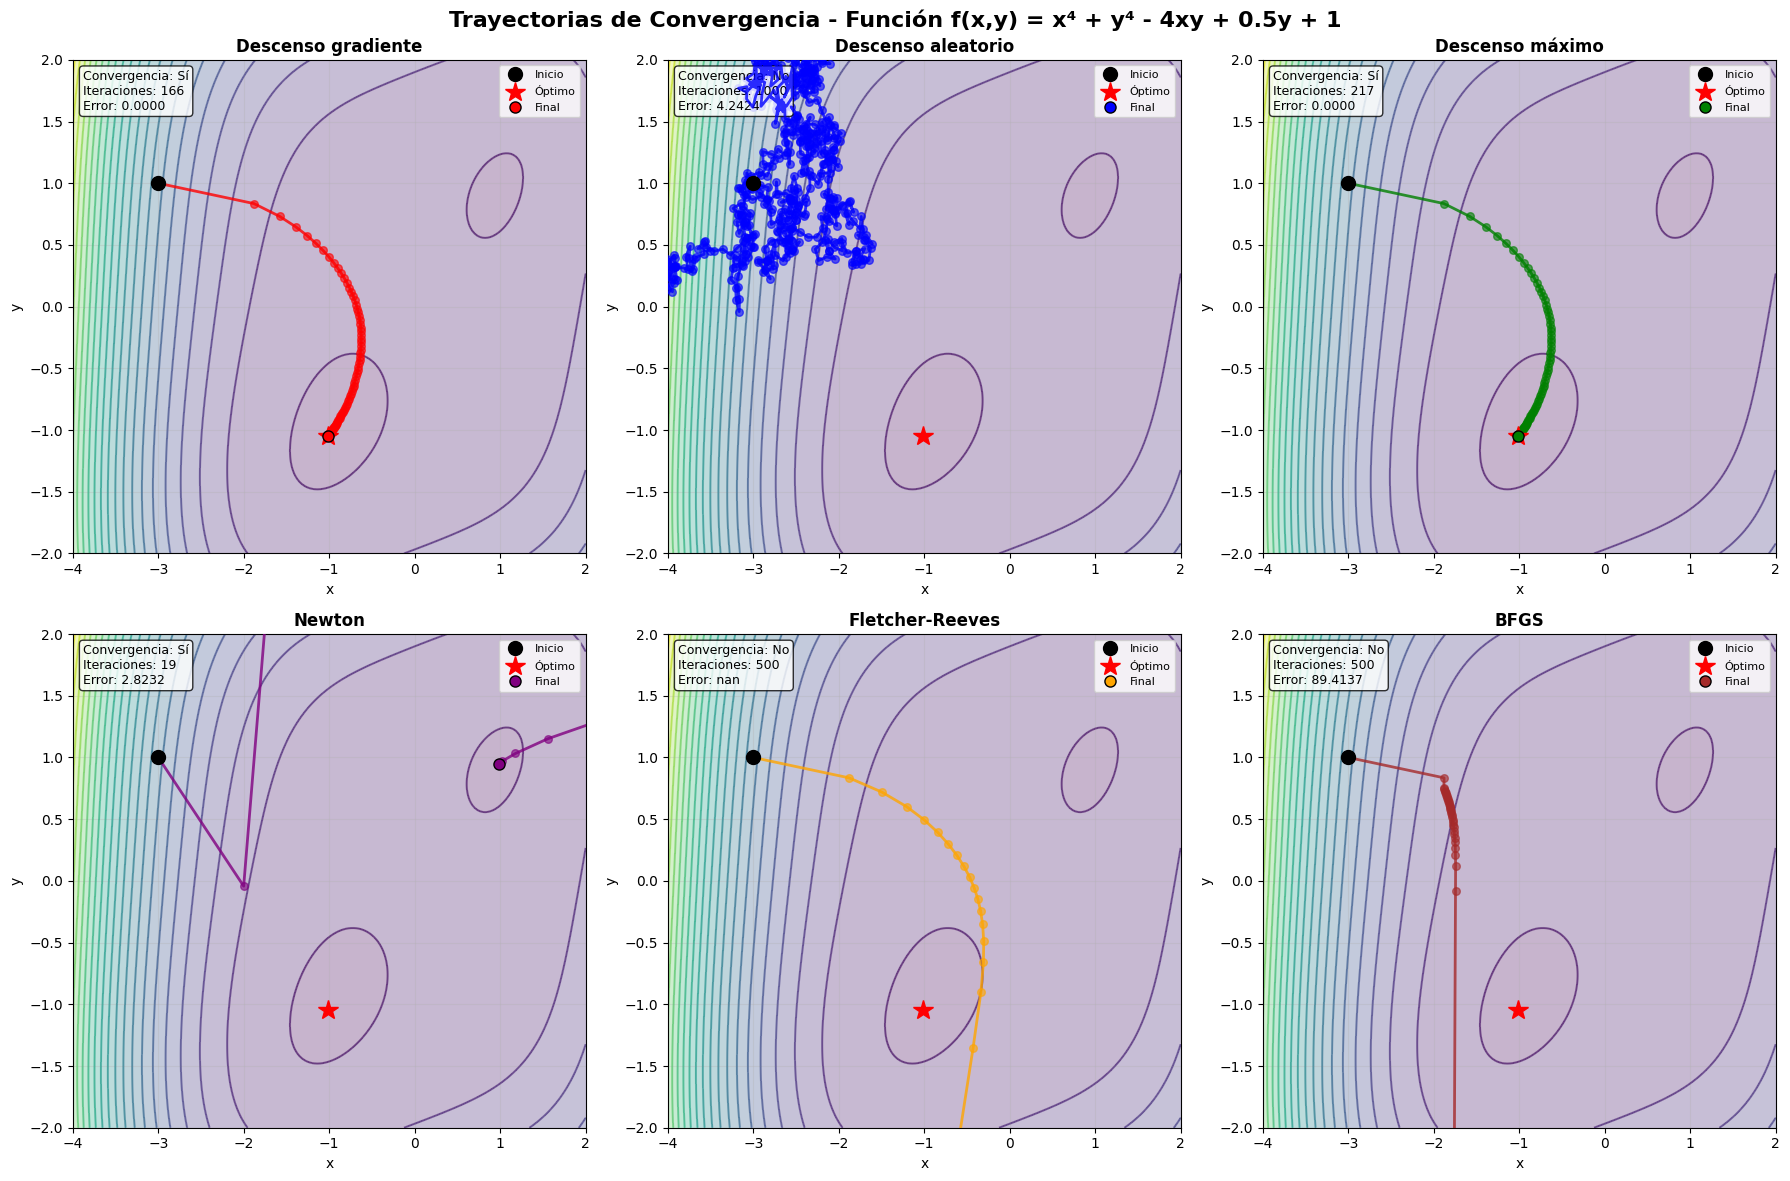

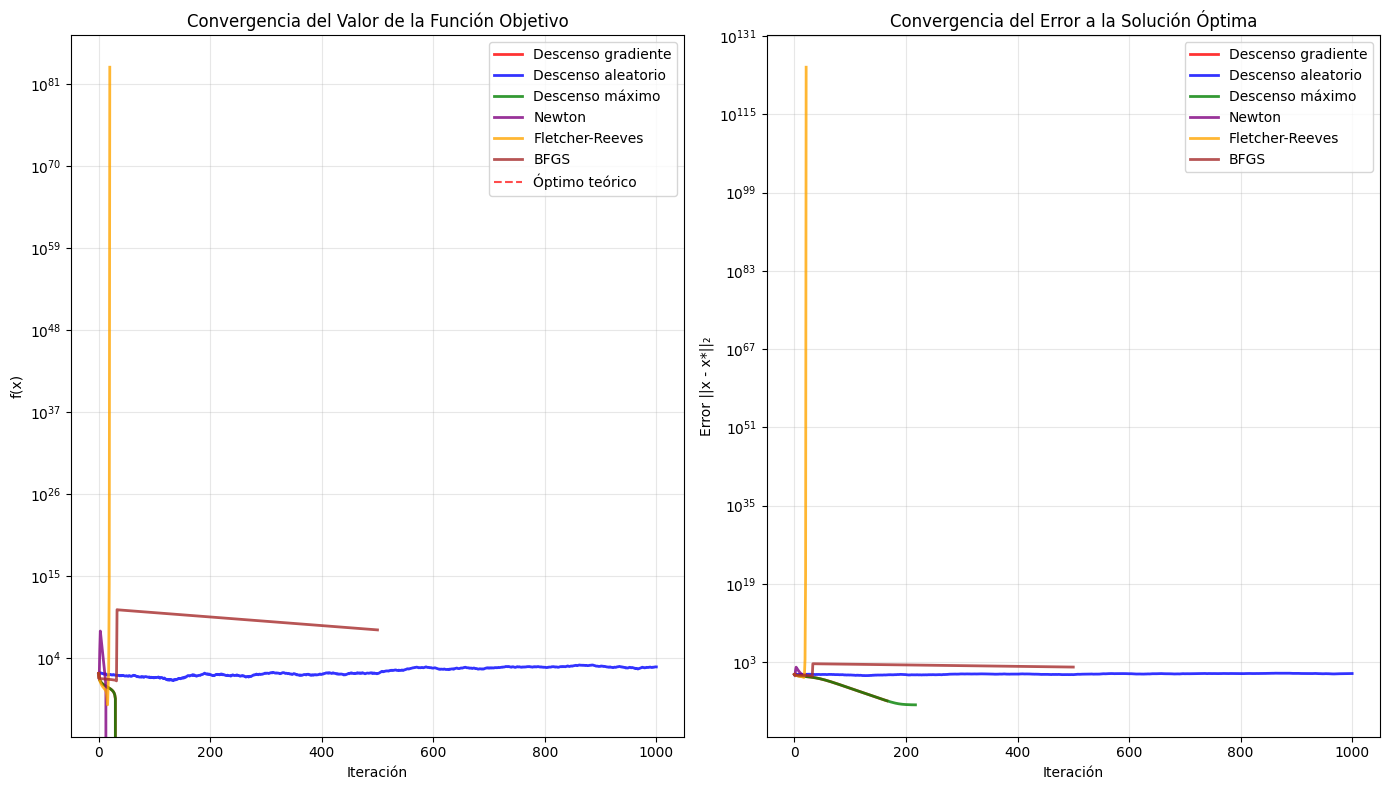

üìä Visualizaciones completadas.

üí° OBSERVACIONES:
- Los contornos muestran las curvas de nivel de la funci√≥n
- El punto negro (‚óè) es el punto inicial
- La estrella roja (‚òÖ) es el √≥ptimo conocido
- Las l√≠neas de colores muestran la trayectoria de cada algoritmo
- Los c√≠rculos de colores (‚óè) marcan el punto final de cada algoritmo


In [ ]:
# VISUALIZACI√ìN DE LAS TRAYECTORIAS DE CONVERGENCIA
print("\n" + "="*70)
print("VISUALIZACI√ìN DE TRAYECTORIAS DE CONVERGENCIA")
print("="*70)

# Crear mesh para el contour plot
x_range = np.linspace(-4, 2, 200)
y_range = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f_a([X[i, j], Y[i, j]])

# Configurar la figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Trayectorias de Convergencia - Funci√≥n f(x,y) = x‚Å¥ + y‚Å¥ - 4xy + 0.5y + 1', 
             fontsize=16, fontweight='bold')

algoritmos_plot = ['Descenso gradiente', 'Descenso aleatorio', 'Descenso m√°ximo', 
                   'Newton', 'Fletcher-Reeves', 'BFGS']
colores = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Dibujar contornos de la funci√≥n
    contour = ax.contour(X, Y, Z, levels=20, alpha=0.6, cmap='viridis')
    ax.contourf(X, Y, Z, levels=20, alpha=0.3, cmap='viridis')
    
    # Marcar punto inicial y √≥ptimo
    ax.plot(x0[0], x0[1], 'ko', markersize=10, label='Inicio', zorder=5)
    ax.plot(x_optimo[0], x_optimo[1], 'r*', markersize=15, label='√ìptimo', zorder=5)
    
    # Dibujar trayectoria si el algoritmo funcion√≥
    if nombre in resultados and resultados[nombre] is not None:
        hist_x = resultados[nombre]['historial_x']
        if len(hist_x) > 1:
            x_traj = [punto[0] for punto in hist_x]
            y_traj = [punto[1] for punto in hist_x]
            
            # L√≠nea de trayectoria
            ax.plot(x_traj, y_traj, color=color, linewidth=2, alpha=0.8, zorder=4)
            
            # Puntos de la trayectoria
            ax.scatter(x_traj[1:-1], y_traj[1:-1], c=color, s=30, alpha=0.6, zorder=3)
            
            # Punto final
            ax.plot(x_traj[-1], y_traj[-1], 'o', color=color, markersize=8, 
                   markeredgecolor='black', markeredgewidth=1, label='Final', zorder=5)
            
            # Informaci√≥n del algoritmo
            conv_text = "S√≠" if resultados[nombre]['convergencia'] else "No"
            iter_text = resultados[nombre]['iteraciones']
            error_text = f"{resultados[nombre]['error']:.4f}"
            
            ax.text(0.02, 0.98, f'Convergencia: {conv_text}\nIteraciones: {iter_text}\nError: {error_text}',
                   transform=ax.transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f'{nombre}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_xlim(-4, 2)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

# Gr√°fico de convergencia de la funci√≥n objetivo
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    if nombre in resultados and resultados[nombre] is not None:
        hist_f = resultados[nombre]['historial_f']
        if len(hist_f) > 1:
            plt.plot(hist_f, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.axhline(y=f_optimo, color='red', linestyle='--', alpha=0.7, label='√ìptimo te√≥rico')
plt.xlabel('Iteraci√≥n')
plt.ylabel('f(x)')
plt.title('Convergencia del Valor de la Funci√≥n Objetivo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Gr√°fico del error vs iteraciones
plt.subplot(1, 2, 2)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    if nombre in resultados and resultados[nombre] is not None:
        hist_x = resultados[nombre]['historial_x']
        if len(hist_x) > 1:
            errores = [np.linalg.norm(np.array(punto) - x_optimo) for punto in hist_x]
            plt.plot(errores, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.xlabel('Iteraci√≥n')
plt.ylabel('Error ||x - x*||‚ÇÇ')
plt.title('Convergencia del Error a la Soluci√≥n √ìptima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()